## Problem Statement 

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts. Given a person’s credit-related information, build a machine learning model that can classify the credit score

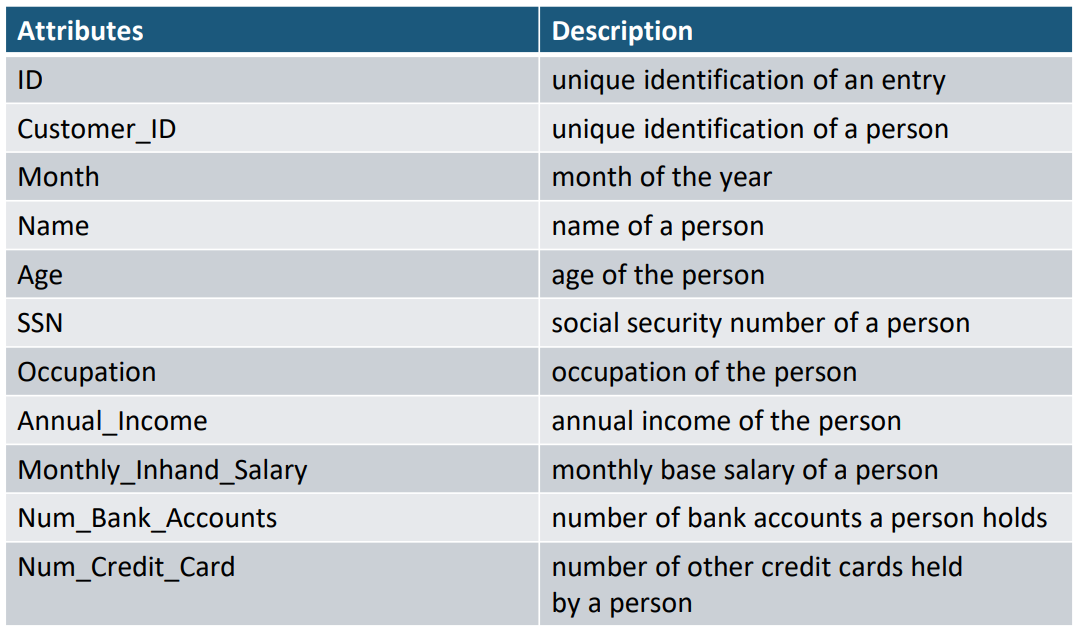
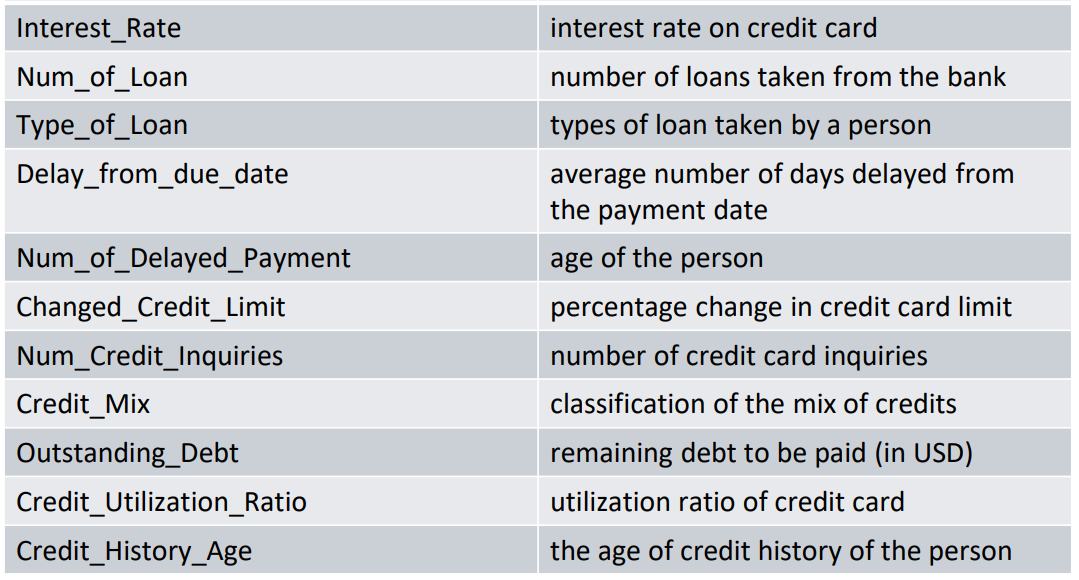
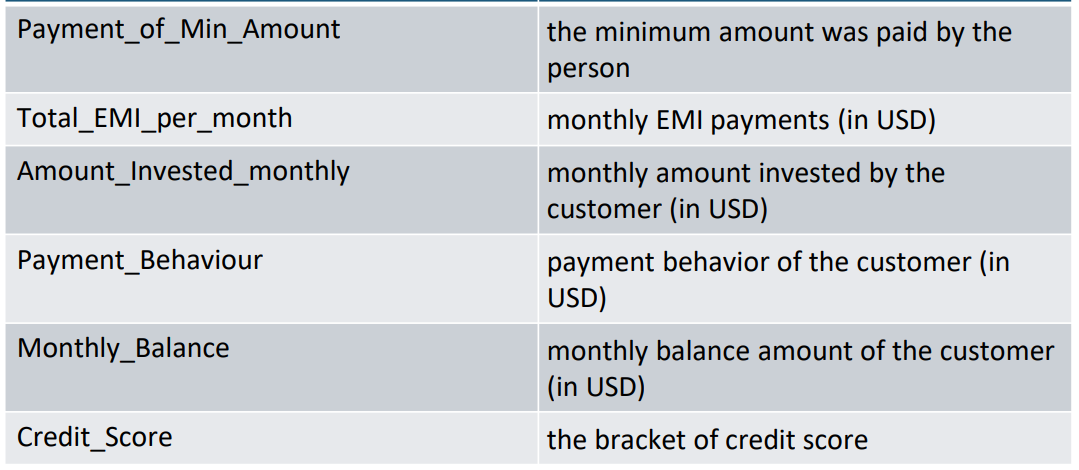

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("credit_score.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


**Observations:**
- Features `ID`, and  `SSN` are unique identification numbers for a customer, both the features have no predictive power.
- Therefore we are dwlwting these columns.

In [4]:
df = df.drop(columns=['ID', 'SSN'])

In [5]:
print(f"No of available records: {df.shape[0]}")
print(f"No. of Features: {df.shape[1]}")

No of available records: 100000
No. of Features: 26


In [6]:
df.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  object 
 6   Monthly_Inhand_Salary     84998 non-null   float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Type_of_Loan              88592 non-null   object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    92998 non-null   ob

**Obdervations:**
- `Age`, `Annual_Income`, `Num_of_Loan`, `Num_of_Delayed_Payment`, `Changed_Credit_Limit`, `Outstanding_Debt`, `Amount_invested_monthly`, and `Monthly_Balance`  columns has inconsistent datatype.
- Placeholer values are visible instead of `Nan` for some features.
- Inaccurate values for a variable are present for some of the features.-

## Data Cleaning

### Making Data Consistent:

In [8]:
def find_non_numeric(df, column):
    """
    A helper function to find out the strings with non-numeric characters.
    input : 
        df : dataframe name
        column: column name of data frame that has strings with non numeric chars 
    output:
        list : list of the strings that contains non numeric characters.
    """
    
    non_numeric =[]
    char_ls = [str(i) for i in range(10)]
    char_ls.append('.')
    char_ls
    
    for i, val in enumerate(df[column].unique()):
        
        if type(val) == str:
            val_ls = list(val)
            for i,char in enumerate(val_ls):
                if char not in char_ls:
                    non_numeric.append(val)
                else:
                    continue
        else:
            continue
            
    return non_numeric

**1)Age**

In [9]:
find_non_numeric(df, 'Age')

['-500',
 '28_',
 '34_',
 '30_',
 '24_',
 '33_',
 '35_',
 '31_',
 '40_',
 '37_',
 '54_',
 '21_',
 '20_',
 '43_',
 '38_',
 '18_',
 '2111_',
 '46_',
 '16_',
 '19_',
 '47_',
 '53_',
 '25_',
 '27_',
 '55_',
 '42_',
 '48_',
 '49_',
 '50_',
 '32_',
 '22_',
 '17_',
 '29_',
 '15_',
 '51_',
 '26_',
 '39_',
 '14_',
 '36_',
 '44_',
 '7670_',
 '45_',
 '23_',
 '41_',
 '52_',
 '733_',
 '5769_',
 '4383_',
 '56_',
 '2650_',
 '3307_',
 '6962_',
 '5589_',
 '6556_',
 '1447_',
 '8153_',
 '3834_',
 '6744_',
 '6471_',
 '7723_',
 '7640_',
 '6408_',
 '3502_',
 '7316_',
 '1102_',
 '8669_',
 '2463_',
 '6666_',
 '3055_',
 '1248_',
 '2220_',
 '2159_',
 '4583_',
 '3988_',
 '2155_',
 '6770_',
 '1843_',
 '1367_',
 '3742_',
 '2171_',
 '5109_',
 '3984_',
 '2474_',
 '5046_',
 '7715_',
 '2329_',
 '707_',
 '844_',
 '2756_',
 '2037_',
 '902_',
 '8523_',
 '3640_',
 '3998_',
 '3712_',
 '2097_',
 '8348_',
 '5373_',
 '3291_',
 '2994_',
 '3339_',
 '2812_',
 '3578_',
 '3564_',
 '1794_',
 '737_',
 '4301_',
 '2846_',
 '2373_',
 '

**Observations:**
- `Age` column contains `_` char at index position of the string.
- `Age` column has invalid values (age > 100, negative age)

In [10]:
## removing '_' char from string and converting 'age' column to int datatype
df['Age'] = df['Age'].str.replace("_", "").astype(int)

In [11]:
df.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [12]:
## checking for 'Age' between 0-100  
age_counter = {}
age_counter['>100'] = 0
for i in range(df['Age'].max()):
    shape = df.loc[df['Age']==i].shape[0]
    if i < 100 and shape > 0:
        age_counter[i] = shape
    elif i > 100:
        age_counter['>100'] += shape
age_counter

{'>100': 1889,
 14: 1175,
 15: 1574,
 16: 1455,
 17: 1502,
 18: 2385,
 19: 2793,
 20: 2744,
 21: 2716,
 22: 2785,
 23: 2654,
 24: 2714,
 25: 2861,
 26: 2945,
 27: 2859,
 28: 2968,
 29: 2735,
 30: 2727,
 31: 2955,
 32: 2884,
 33: 2543,
 34: 2837,
 35: 2866,
 36: 2868,
 37: 2742,
 38: 2994,
 39: 2846,
 40: 2609,
 41: 2785,
 42: 2577,
 43: 2734,
 44: 2824,
 45: 2642,
 46: 1621,
 47: 1227,
 48: 1385,
 49: 1375,
 50: 1273,
 51: 1291,
 52: 1356,
 53: 1354,
 54: 1311,
 55: 1366,
 56: 362,
 95: 3,
 99: 1}

**Observations:**
- 1889 observations has age value greater than 100, needs an investiagtion
- age values 95 and 99 seems suspicious

In [13]:
## checking random sample of `Customer_Id` that has Age > 0 or Age <0
df.loc[(df['Age']>100) | (df['Age'] < 0)]['Customer_ID'].sample(5)

10314    CUS_0x1540
7882     CUS_0x4f7d
63559    CUS_0x6e8d
82866    CUS_0x82a3
7228      CUS_0xb2e
Name: Customer_ID, dtype: object

In [14]:
df.loc[(df['Customer_ID'] == 'CUS_0x8543')]

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
76448,CUS_0x8543,January,NaN,44,Musician,36637.1,3069.091667,7,6,15,...,_,68.98,24.874041,27 Years and 4 Months,No,50.96763,53.693471503096994,High_spent_Large_value_payments,442.2480649496426,Standard
76449,CUS_0x8543,February,Ulf Laessingu,44,_______,36637.1,3069.091667,7,6,15,...,Standard,68.98,34.391691,27 Years and 5 Months,No,50.96763,180.1055066962867,Low_spent_Large_value_payments,345.83602975645294,Standard
76450,CUS_0x8543,March,Ulf Laessingu,44,Musician,36637.1,3069.091667,7,6,15,...,Standard,68.98,27.837172,27 Years and 6 Months,No,50.96763,65.16251759379685,High_spent_Small_value_payments,450.7790188589428,Standard
76451,CUS_0x8543,April,Ulf Laessingu,44,Musician,36637.1,3069.091667,7,6,15,...,_,68.98,29.022696,27 Years and 7 Months,No,50.96763,207.39720242979774,Low_spent_Small_value_payments,338.5443340229419,Standard
76452,CUS_0x8543,May,Ulf Laessingu,44,Musician,36637.1,3069.091667,7,6,15,...,Standard,68.98,35.168138,27 Years and 8 Months,No,50.96763,216.85787527599445,Low_spent_Small_value_payments,329.0836611767452,Standard
76453,CUS_0x8543,June,Ulf Laessingu,44,Musician,36637.1,3069.091667,7,6,15,...,Standard,68.98,31.807710,27 Years and 9 Months,No,50.96763,125.59207602989204,High_spent_Medium_value_payments,380.3494604228477,Standard
76454,CUS_0x8543,July,Ulf Laessingu,45,Musician,36637.1,3069.091667,7,6,15,...,_,68.98,25.902490,27 Years and 10 Months,No,50.96763,264.0800730205463,Low_spent_Large_value_payments,261.8614634321933,Standard
76455,CUS_0x8543,August,Ulf Laessingu,4862,Musician,36637.1,3069.091667,7,6,15,...,Standard,68.98,31.637389,27 Years and 11 Months,NM,50.96763,__10000__,!@9#%8,160.64863939121582,Standard


**Observations:**
- Age of the observations that has Age > 0 or Age < 0, can be replaced by the average age of that perticular Customer_Id

In [15]:
## replacing negative age and age greater than 100 by perticular customer's avg age
cus_ids = df.loc[(df['Age']>90) | (df['Age'] < 0)]['Customer_ID']
for cus_id in cus_ids:
    age = int(df.loc[(df['Customer_ID'] == cus_id) & ((0 < df['Age'] ) & (df['Age'] < 90))]['Age'].mean())
    df.loc[df['Customer_ID'] == cus_id, 'Age'] = age

In [16]:
## checking for 'Age' between 0-100  
age_counter = {}
age_counter['>100'] = 0
for i in range(df['Age'].max()):
    shape = df.loc[df['Age']==i].shape[0]
    if i < 100 and shape > 0:
        age_counter[i] = shape
    elif i > 100:
        age_counter['>100'] += shape
age_counter

{'>100': 0,
 14: 1312,
 15: 1604,
 16: 1487,
 17: 1549,
 18: 2513,
 19: 2916,
 20: 2812,
 21: 2836,
 22: 2830,
 23: 2735,
 24: 2794,
 25: 2951,
 26: 3052,
 27: 2868,
 28: 3098,
 29: 2812,
 30: 2750,
 31: 3080,
 32: 2979,
 33: 2625,
 34: 2945,
 35: 2916,
 36: 2971,
 37: 2769,
 38: 3116,
 39: 2933,
 40: 2678,
 41: 2841,
 42: 2690,
 43: 2820,
 44: 2877,
 45: 2695,
 46: 1630,
 47: 1204,
 48: 1452,
 49: 1406,
 50: 1359,
 51: 1260,
 52: 1406,
 53: 1384,
 54: 1351,
 55: 1399}

**2)Annual Income**

In [17]:
find_non_numeric(df, 'Annual_Income')

['34847.84_',
 '30689.89_',
 '35547.71_',
 '34081.38_',
 '114838.41_',
 '88640.24_',
 '54392.16_',
 '8701.545_',
 '25546.26_',
 '92047.08_',
 '97791.42_',
 '10183.015_',
 '106733.13_',
 '12600.445_',
 '57983.12_',
 '34290.12_',
 '43070.24_',
 '6515990.0_',
 '39641.54_',
 '29469.98_',
 '15566.02_',
 '20574.47_',
 '148699.32_',
 '14165.23_',
 '81842.28_',
 '123732.32_',
 '78988.48_',
 '41746.76_',
 '73737.36_',
 '75273.24_',
 '54820.89_',
 '58674.66_',
 '30390.44_',
 '144546.72_',
 '30346.35_',
 '72330.98_',
 '43241.49_',
 '17787.34_',
 '134978.24_',
 '14841.35_',
 '66105.4_',
 '27070.07_',
 '17992.775_',
 '18305.25_',
 '14205.09_',
 '43758.34_',
 '144881.68_',
 '134321.44_',
 '56803.71_',
 '66528.24_',
 '19403.405_',
 '8908998.0_',
 '15015.4_',
 '19777.05_',
 '55151.04_',
 '30536.62_',
 '19795.52_',
 '18717.02_',
 '27796.42_',
 '132872.72_',
 '41735.55_',
 '40391.66_',
 '7441.295_',
 '24585.55_',
 '15013.73_',
 '34212.01_',
 '24199.24_',
 '28587.29_',
 '16578.115_',
 '34766.06_',
 '1685

In [18]:
## removing '_' char from string and converting 'age' column to int datatype
df['Annual_Income'] = df['Annual_Income'].str.replace("_", "").astype(float)

In [19]:
## rounding values up to 2 decimals
df['Annual_Income'] = np.round(df['Annual_Income'], 2)

**3) Num of Loan**

In [20]:
find_non_numeric(df, 'Num_of_Loan')

['-100',
 '0_',
 '3_',
 '2_',
 '5_',
 '8_',
 '9_',
 '4_',
 '7_',
 '1_',
 '6_',
 '597_',
 '92_',
 '1347_',
 '1185_',
 '235_',
 '1459_',
 '1320_',
 '630_',
 '359_',
 '1225_',
 '131_',
 '1311_',
 '1129_',
 '785_',
 '143_',
 '1131_',
 '27_',
 '1171_',
 '227_',
 '378_',
 '1219_',
 '527_',
 '1027_',
 '696_',
 '1132_']

In [21]:
## removing '_' char from string and converting 'Num_of_Loan' column to int datatype
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace("_", "").astype(int)

In [22]:
loan_counter = {}
loan_counter['>100'] = 0
for i in range(df['Num_of_Loan'].max()):
    shape = df.loc[df['Num_of_Loan']==i].shape[0]
    if i < 100 and shape > 0:
        loan_counter[i] = shape
    elif i > 100:
        loan_counter['>100'] += shape
loan_counter

{'>100': 436,
 0: 10930,
 1: 10606,
 2: 15032,
 3: 15104,
 4: 14743,
 5: 7197,
 6: 7803,
 7: 7344,
 8: 3191,
 9: 3702,
 17: 1,
 18: 1,
 19: 1,
 23: 2,
 27: 1,
 29: 1,
 31: 2,
 32: 1,
 33: 2,
 39: 1,
 41: 1,
 49: 2,
 50: 2,
 52: 1,
 54: 1,
 55: 1,
 56: 1,
 58: 2,
 65: 1,
 70: 1,
 78: 1,
 83: 1,
 84: 1,
 87: 1,
 89: 1,
 92: 1,
 95: 2}

**Observations:**
- No of laon greater than 10 seems unusual

In [23]:
df.loc[df['Num_of_Loan'] == 17]

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
72894,CUS_0x15b7,July,Anna Driverc,37,Engineer,54201.99,4535.8325,6,9,30,...,Bad,2339.06,28.053334,9 Years and 1 Months,Yes,108.109674,140.66190067851542,High_spent_Medium_value_payments,454.811675004006,Poor


In [24]:
df.loc[:, ['Name', 'Month','Annual_Income', 'Num_of_Loan', "Type_of_Loan"]].loc[df['Customer_ID'] == 'CUS_0x5b48']

,Name,Month,Annual_Income,Num_of_Loan,Type_of_Loan
184,NaN,January,12600.44,-100,"Not Specified, Student Loan, and Student Loan"
185,McBrideq,February,12600.44,-100,"Not Specified, Student Loan, and Student Loan"
186,NaN,March,12600.44,3,"Not Specified, Student Loan, and Student Loan"
187,NaN,April,12600.44,3,"Not Specified, Student Loan, and Student Loan"
188,McBrideq,May,12600.44,3,"Not Specified, Student Loan, and Student Loan"
189,McBrideq,June,12600.44,3,"Not Specified, Student Loan, and Student Loan"
190,McBrideq,July,12600.44,3,"Not Specified, Student Loan, and Student Loan"
191,NaN,August,12600.44,3,"Not Specified, Student Loan, and Student Loan"


In [25]:
## replacing num_of_loan < 0 and num_of_loan > 10 by perticular observation's type_of_loan count
cus_ids = df.loc[(df['Num_of_Loan']>10) | (df['Num_of_Loan'] < 0)]['Customer_ID']
for cus_id in cus_ids:
    
    mask = ((df['Customer_ID'] == cus_id) & ((df['Num_of_Loan'] > 10) | (df['Num_of_Loan'] < 0)))
    loan_list = list(df["Type_of_Loan"].loc[mask].unique())
    
    if type(loan_list) == str and len(loan_list)>0:
        num_loan = len(loan_list[0].split(","))
    else:
        num_loan = 0
        
    df.loc[mask, 'Num_of_Loan'] = num_loan

In [26]:
loan_counter = {}
loan_counter['>100'] = 0
for i in range(df['Num_of_Loan'].max()):
    shape = df.loc[df['Num_of_Loan']==i].shape[0]
    if i < 100 and shape > 0:
        loan_counter[i] = shape
    elif i > 100:
        loan_counter['>100'] += shape
loan_counter

{'>100': 0,
 0: 15278,
 1: 10606,
 2: 15032,
 3: 15104,
 4: 14743,
 5: 7197,
 6: 7803,
 7: 7344,
 8: 3191}

**4) Num of Delayed_Payment**

In [27]:
find_non_numeric(df, 'Num_of_Delayed_Payment')

['8_',
 '-1',
 '3_',
 '2_',
 '13_',
 '14_',
 '12_',
 '22_',
 '4_',
 '11_',
 '21_',
 '10_',
 '183_',
 '9_',
 '19_',
 '24_',
 '17_',
 '23_',
 '20_',
 '-3',
 '6_',
 '1_',
 '16_',
 '-2',
 '15_',
 '26_',
 '18_',
 '5_',
 '25_',
 '7_',
 '0_',
 '2569_',
 '27_',
 '663_',
 '-2_',
 '-2_',
 '28_',
 '-1_',
 '-1_',
 '1323_',
 '2794_',
 '2219_',
 '758_',
 '-3_',
 '-3_',
 '848_',
 '2237_',
 '3097_',
 '2566_',
 '3840_',
 '2278_',
 '1087_',
 '1295_',
 '3861_',
 '2142_',
 '1473_',
 '3920_']

In [28]:
## removing '_' char from string and converting 'Num_of_Delayed_Payment' column to int datatype
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace("_", "").astype(float)

In [29]:
delayed_pament_counter = {}
delayed_pament_counter['>100'] = 0
for i in range(int(df['Num_of_Delayed_Payment'].max())):
    shape = df.loc[df['Num_of_Delayed_Payment']==i].shape[0]
    if i < 100 and shape > 0:
        delayed_pament_counter[i] = shape
    elif i > 100:
        delayed_pament_counter['>100'] += shape
delayed_pament_counter

{'>100': 723,
 0: 1609,
 1: 1636,
 2: 1810,
 3: 1931,
 4: 1838,
 5: 2091,
 6: 2321,
 7: 2385,
 8: 4873,
 9: 4981,
 10: 5309,
 11: 4810,
 12: 5059,
 13: 4036,
 14: 4193,
 15: 5237,
 16: 5312,
 17: 5412,
 18: 5216,
 19: 5481,
 20: 5089,
 21: 2553,
 22: 2339,
 23: 2028,
 24: 1701,
 25: 1665,
 26: 322,
 27: 250,
 28: 131,
 46: 1,
 47: 1,
 49: 1,
 52: 1,
 72: 1,
 80: 1,
 84: 1,
 85: 1,
 86: 1,
 88: 1,
 94: 1,
 98: 1}

**5) Changed Credit Limit:**

In [30]:
find_non_numeric(df, 'Changed_Credit_Limit')

['_',
 '-2.01',
 '-1.01',
 '-3.01',
 '-1.2400000000000002',
 '-4.14',
 '-0.14',
 '-2.87',
 '-2.46',
 '-4.26',
 '-1.2599999999999998',
 '-1.33',
 '-1.4900000000000002',
 '-0.31000000000000005',
 '-1.4800000000000004',
 '-1.0599999999999996',
 '-2.17',
 '-1.1',
 '-0.049999999999999815',
 '-5.48',
 '-4.48',
 '-1.2800000000000002',
 '-1.93',
 '-1.94',
 '-5.02',
 '-4.2',
 '-0.040000000000000036',
 '-2.11',
 '-3.37',
 '-3.43',
 '-0.43000000000000016',
 '-3.69',
 '-2.69',
 '-3.52',
 '-1.0099999999999998',
 '-0.31999999999999995',
 '-3.58',
 '-0.05000000000000005',
 '-4.76',
 '-1.76',
 '-0.5',
 '-1.7999999999999998',
 '-0.7999999999999998',
 '-3.5',
 '-3.93',
 '-5.78',
 '-1.29',
 '-0.29000000000000004',
 '-3.67',
 '-1.28',
 '-1.21',
 '-2.52',
 '-0.5199999999999996',
 '-4.19',
 '-0.7400000000000002',
 '-2.34',
 '-0.33999999999999986',
 '-0.2599999999999998',
 '-1.6500000000000004',
 '-0.020000000000000014',
 '-1.16',
 '-2.16',
 '-5.63',
 '-2.37',
 '-2.49',
 '-0.07999999999999996',
 '-4.33',
 '-

In [31]:
df['Changed_Credit_Limit'].mask(df['Changed_Credit_Limit'] == '_', np.nan, inplace = True)


In [32]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [33]:
df['Changed_Credit_Limit'] = np.round(df['Changed_Credit_Limit'], 2)

**6) Outstanding_Debt:**

In [34]:
find_non_numeric(df, 'Outstanding_Debt')

['1328.93_',
 '1283.37_',
 '2797.17_',
 '3818.57_',
 '343.84_',
 '363.51_',
 '404.51_',
 '1755.81_',
 '2593.44_',
 '89.62_',
 '1054.86_',
 '1374.23_',
 '1166.47_',
 '457.81_',
 '1684.06_',
 '1126.35_',
 '2098.83_',
 '761.18_',
 '1343.01_',
 '1342.61_',
 '1435.94_',
 '2354.21_',
 '1319.87_',
 '821.27_',
 '3271.84_',
 '465.04_',
 '218.25_',
 '1274.59_',
 '1033.59_',
 '642.42_',
 '94.75_',
 '4145.87_',
 '328.41_',
 '4813.02_',
 '477.41_',
 '165.88_',
 '1286.68_',
 '128.33_',
 '2106.68_',
 '3078.82_',
 '634.77_',
 '878.19_',
 '2518.51_',
 '1235.48_',
 '669.35_',
 '240.6_',
 '70.66_',
 '3099.57_',
 '486.48_',
 '1124.37_',
 '152.6_',
 '1716.82_',
 '886.09_',
 '1370.48_',
 '640.4_',
 '484.43_',
 '1417.89_',
 '1539.61_',
 '2517.0_',
 '539.59_',
 '802.47_',
 '289.1_',
 '4542.88_',
 '590.85_',
 '155.2_',
 '697.86_',
 '825.25_',
 '1644.31_',
 '960.38_',
 '282.06_',
 '985.01_',
 '1491.56_',
 '3723.83_',
 '1350.6_',
 '1248.05_',
 '3531.62_',
 '1017.45_',
 '60.04_',
 '2468.2_',
 '2234.83_',
 '1073.7

In [35]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace("_", "").astype(float)

**7) Amount_invested_monthly:**

In [36]:
find_non_numeric(df, 'Amount_invested_monthly')

['__10000__', '__10000__', '__10000__', '__10000__']

In [37]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace("__", "").astype(float)

**8) Monthly_Balance:**

In [38]:
find_non_numeric(df, 'Monthly_Balance')

['__-333333333333333333333333333__',
 '__-333333333333333333333333333__',
 '__-333333333333333333333333333__',
 '__-333333333333333333333333333__',
 '__-333333333333333333333333333__']

In [39]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace("__", "").astype(float)

In [40]:
df.loc[(df['Monthly_Balance'] == -333333333333333333333333333.0)]['Customer_ID']

5545     CUS_0x9885
26177    CUS_0x5a90
29158    CUS_0x288d
35570    CUS_0x85e9
38622    CUS_0x2b77
60009    CUS_0xc06e
75251    CUS_0x57f3
82918    CUS_0x41bf
83255    CUS_0x2f7e
Name: Customer_ID, dtype: object

In [41]:
df.loc[:,['Customer_ID', 'Month', 'Name', 'Monthly_Balance']].loc[df['Customer_ID'] == 'CUS_0x288d']

,Customer_ID,Month,Name,Monthly_Balance
29152,CUS_0x288d,January,Selamk,2.624056e+02
29153,CUS_0x288d,February,Selamk,2.035331e+02
29154,CUS_0x288d,March,Selamk,3.130902e+02
29155,CUS_0x288d,April,Selamk,1.801038e+02
29156,CUS_0x288d,May,Selamk,3.976739e+02
29157,CUS_0x288d,June,Selamk,3.923144e+02
29158,CUS_0x288d,July,Selamk,-3.333333e+26
29159,CUS_0x288d,August,Selamk,2.335291e+02


In [42]:
## replacing '-333333333333333333333333333.0' by NaN
df['Monthly_Balance'].mask(df['Monthly_Balance'] == -333333333333333333333333333.0, np.nan, inplace = True)

### Data Tidying:
**Converting untidy data to tidy data**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  int32  
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     84998 non-null   float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  int32  
 11  Type_of_Loan              88592 non-null   object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    92998 non-null   fl

In [44]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['Customer_ID', 'Month', 'Name', 'Occupation', 'Type_of_Loan',
       'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [45]:
for col in cat_cols:
    if col != 'Customer_ID' and col != 'Name':
        cat = df[col].unique()
        ncat = len(cat)
        print(f"""------------------------------------------------------------------------------------------------------
        {ncat} unique categories of column {col}:
                                {cat}
        
        """)

------------------------------------------------------------------------------------------------------
        8 unique categories of column Month:
                                ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
        
        
------------------------------------------------------------------------------------------------------
        16 unique categories of column Occupation:
                                ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
        
        
------------------------------------------------------------------------------------------------------
        6261 unique categories of column Type_of_Loan:
                                ['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity

**Observations:**
- `Occupation` column has '_______' as a placeholder for null values.
- `Credit_Mix` column has '_' as a placeholder for null values.
- `Payment_of_Min_Amount` has spelling mistake 'nm' --> 'no'
- `Payment_Behaviour` has random characters (!@9#%8) typed in.
- `Credit_History_Age` column contains age written in words (22 Years and 4 Months)
- `Type_of_Loan` column contains combination of set of unique loan type

In [46]:
## replacing placeholder and random typed characters by bp.nan
 
df['Occupation'].mask(df['Occupation'] == '_______', np.nan, inplace = True)
df['Credit_Mix'].mask(df['Credit_Mix'] == '_', np.nan, inplace = True)
df['Payment_of_Min_Amount'].mask(df['Payment_of_Min_Amount'] == 'NM', 'No', inplace = True)
df['Payment_Behaviour'].mask(df['Payment_Behaviour'] == '!@9#%8', np.nan, inplace = True)

In [47]:
## exctracting unique loan categories

unique_loan_type = df['Type_of_Loan'].unique()
loan_type = []

for i, l_type in enumerate(unique_loan_type):
    
    if type(l_type) == str:
        
        loan_type_list = list(df['Type_of_Loan'].unique())[i].split(',')

        for loan in loan_type_list:
            loan = loan.strip()
            loan = loan.split('and ')[-1]
            loan_type.append(loan)
        
set(loan_type)

{'Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan'}

In [48]:
## creating copy of dataframe for tidying
df1 = df.copy()

## creating a column fot each unique loan category and assigning 0 to each of sample.
for t in set(loan_type):
    df1[t] = 0

In [49]:
df1.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Score,Auto Loan,Personal Loan,Debt Consolidation Loan,Payday Loan,Credit-Builder Loan,Home Equity Loan,Not Specified,Student Loan,Mortgage Loan
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,0,0,0,0,0,0,0,0,0
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,0,0,0,0,0,0,0,0,0
2,CUS_0xd40,March,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,0,0,0,0,0,0,0,0,0
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,0,0,0,0,0,0,0,0,0
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,0,0,0,0,0,0,0,0,0


In [50]:
## Assigning the value 1 to a unique loan category columns,
## for each individual loan in the combination of loans from 'Type_of_Loan' column

for i in range(len(df)):
    
    unique_loan_type = df1['Type_of_Loan'][i] #extracting loan_type from ith sample
    
    if type(unique_loan_type) == str:
        ln_types = unique_loan_type.split(",") #splitting the combination of loans to each individuals
        for loan in ln_types:
            loan = loan.strip() #removing whitespaces
            loan = loan.split('and ')[-1] #removing word "and"
            df1[loan][i] = 1           #assigning the value 1 to column == extracted loan category
        

In [51]:
df1.drop(columns = ['Type_of_Loan'], inplace = True)
df1.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Score,Auto Loan,Personal Loan,Debt Consolidation Loan,Payday Loan,Credit-Builder Loan,Home Equity Loan,Not Specified,Student Loan,Mortgage Loan
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,1,1,0,0,1,1,0,0,0
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,1,1,0,0,1,1,0,0,0
2,CUS_0xd40,March,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,1,1,0,0,1,1,0,0,0
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,1,1,0,0,1,1,0,0,0
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,1,1,0,0,1,1,0,0,0


In [52]:
## converting "Credit_History_Age" written in words to age in months:
## e.g. 12 years and 4 months --> 148 months

yrtomn = df1['Credit_History_Age'].str.split(' ').str.get(0).astype(float)*12
mn = df1['Credit_History_Age'].str.split(' ').str.get(-2).astype(float)
df1['Credit_History_Age_Months'] = yrtomn + mn
df1.drop(columns = 'Credit_History_Age', inplace =True)
df1.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Auto Loan,Personal Loan,Debt Consolidation Loan,Payday Loan,Credit-Builder Loan,Home Equity Loan,Not Specified,Student Loan,Mortgage Loan,Credit_History_Age_Months
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,1,1,0,0,1,1,0,0,0,265.0
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,1,1,0,0,1,1,0,0,0,NaN
2,CUS_0xd40,March,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,1,1,0,0,1,1,0,0,0,267.0
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,1,1,0,0,1,1,0,0,0,268.0
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,1,1,0,0,1,1,0,0,0,269.0


In [91]:
df = df1.copy()

In [92]:
cat_cols = df.select_dtypes(include = 'object').columns
for col in cat_cols:
    if col != 'Customer_ID' and col != 'Name':
        cat = df[col].unique()
        ncat = len(cat)
        print(f"""------------------------------------------------------------------------------------------------------
        {ncat} unique categories of column {col}:
                                {cat}
        
        """)

------------------------------------------------------------------------------------------------------
        8 unique categories of column Month:
                                ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
        
        
------------------------------------------------------------------------------------------------------
        16 unique categories of column Occupation:
                                ['Scientist' nan 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
        
        
------------------------------------------------------------------------------------------------------
        4 unique categories of column Credit_Mix:
                                [nan 'Good' 'Standard' 'Bad']
        
        
------------------------------------------------------------------------------------------------------
        2 uni

### Handling Missing Values:

In [93]:
def missing_df(df):
    
    missing_df= pd.DataFrame(df.isnull().sum(), columns = ['count'])
    missing_df['missing_proportion'] = df.isnull().mean()
    missing_df.sort_values(by = 'count', ascending=False, inplace = True)
    
    return missing_df

In [94]:
missing_df(df)

,count,missing_proportion
Credit_Mix,20195,0.20195
Monthly_Inhand_Salary,15002,0.15002
Name,9985,0.09985
Credit_History_Age_Months,9030,0.09030
Payment_Behaviour,7600,0.07600
Occupation,7062,0.07062
Num_of_Delayed_Payment,7002,0.07002
Amount_invested_monthly,4479,0.04479
Monthly_Balance,2877,0.02877
Changed_Credit_Limit,2091,0.02091


In [95]:
print(f'Maximum no of missing values in any observation: {df.isnull().sum(axis=1).max()}')

Maximum no of missing values in any observation: 6


**1) Credit_Mix**

In [96]:
## Replacing the null values of 'Credit_Mix' for a perticular Customer_Id 
## by maximum no of(mode of credit_mix) 'Credit_Mix' that customer_id

cus_ids = df.loc[df['Credit_Mix'].isnull()]['Customer_ID'].values
for cus_id in cus_ids:
    mask = ((df['Customer_ID'] == cus_id) & (~df['Credit_Mix'].isnull()))
    val = df.loc[mask]['Credit_Mix'].value_counts().index[0]
    df.loc[((df['Customer_ID'] == cus_id) & (df['Credit_Mix'].isnull())),
           'Credit_Mix'] = val

**2) Monthly_Inhand_Salary**

In [97]:
mask = ((df['Customer_ID'] == 'CUS_0x21b1') )
df.loc[:, ['Name', 'Monthly_Inhand_Salary']].loc[mask]

,Name,Monthly_Inhand_Salary
8,Rick Rothackerj,3037.986667
9,Rick Rothackerj,3037.986667
10,Rick Rothackerj,3037.986667
11,Rick Rothackerj,NaN
12,Rick Rothackerj,3037.986667
13,Rick Rothackerj,3037.986667
14,Rick Rothackerj,NaN
15,Rick Rothackerj,3037.986667


In [98]:
## Replacing the null values of 'Monthly_Inhand_Salary' for a perticular Customer_Id 
## by maximum the mean of  'Monthly_Inhand_Salary' for that customer_id

cus_ids = df.loc[df['Monthly_Inhand_Salary'].isnull()]['Customer_ID'].values
for cus_id in cus_ids:
    mask = ((df['Customer_ID'] == cus_id) & (~df['Monthly_Inhand_Salary'].isnull()))
    val = df.loc[mask]['Monthly_Inhand_Salary'].mean()
    df.loc[((df['Customer_ID'] == cus_id) & (df['Monthly_Inhand_Salary'].isnull())),
           'Monthly_Inhand_Salary'] = val

In [99]:
mask = ((df['Customer_ID'] == 'CUS_0x21b1'))
df.loc[:, ['Name', 'Monthly_Inhand_Salary']].loc[mask]

,Name,Monthly_Inhand_Salary
8,Rick Rothackerj,3037.986667
9,Rick Rothackerj,3037.986667
10,Rick Rothackerj,3037.986667
11,Rick Rothackerj,3037.986667
12,Rick Rothackerj,3037.986667
13,Rick Rothackerj,3037.986667
14,Rick Rothackerj,3037.986667
15,Rick Rothackerj,3037.986667


**3) Credit_History_Age_Months:**

In [100]:
mask = ((df['Customer_ID'] == 'CUS_0xd40') )
df.loc[:, ['Name', 'Credit_History_Age_Months']].loc[mask]

,Name,Credit_History_Age_Months
0,Aaron Maashoh,265.0
1,Aaron Maashoh,NaN
2,Aaron Maashoh,267.0
3,Aaron Maashoh,268.0
4,Aaron Maashoh,269.0
5,Aaron Maashoh,270.0
6,Aaron Maashoh,271.0
7,NaN,NaN


In [104]:
mask = ((df['Customer_ID'] == 'CUS_0x2dbc') )
df.loc[:, ['Name', 'Credit_History_Age_Months']].loc[mask]

,Name,Credit_History_Age_Months
16,Langep,213.0
17,NaN,214.0
18,Langep,215.0
19,Langep,NaN
20,Langep,217.0
21,Langep,218.0
22,NaN,219.0
23,Langep,220.0


In [102]:
df.loc[df['Credit_History_Age_Months'].isnull()]['Customer_ID'].values

array(['CUS_0xd40', 'CUS_0xd40', 'CUS_0x2dbc', ..., 'CUS_0xf16',
       'CUS_0xf16', 'CUS_0x8600'], dtype=object)

In [108]:
cus_ids = df.loc[df['Credit_History_Age_Months'].isnull()]['Customer_ID'].values
for cus_id in cus_ids:
    mask = ((df['Customer_ID'] == cus_id) & (~df['Credit_History_Age_Months'].isnull()))
    null_index = df.loc[((df['Customer_ID'] == cus_id) & (df['Credit_History_Age_Months'].isnull()))]['Credit_History_Age_Months'].index
    ids = df.loc[:, ['Name', 'Credit_History_Age_Months']].loc[((df['Customer_ID'] == cus_id) )].index
    for idx in null_index:
        
        if idx == ids[0]:
            val = df.loc[(df['Customer_ID'] == cus_id)]['Credit_History_Age_Months'][ids[1]]-1
        else:
            val = df.loc[(df['Customer_ID'] == cus_id)]['Credit_History_Age_Months'][ids[0]]+(ids[0] - idx)
        
        df.loc[((df['Customer_ID'] == cus_id) & (df['Credit_History_Age_Months'].isnull())),
           'Credit_History_Age_Months'] = val
    

In [109]:
mask = ((df['Customer_ID'] == 'CUS_0x2dbc') )
df.loc[:, ['Name', 'Credit_History_Age_Months']].loc[mask]

,Name,Credit_History_Age_Months
16,Langep,213.0
17,NaN,214.0
18,Langep,215.0
19,Langep,210.0
20,Langep,217.0
21,Langep,218.0
22,NaN,219.0
23,Langep,220.0


In [111]:
df = df.fillna(method = 'ffill')
df = df.fillna(method = 'bfill')

In [112]:
missing_df(df)

,count,missing_proportion
Customer_ID,0,0.0
Personal Loan,0,0.0
Total_EMI_per_month,0,0.0
Amount_invested_monthly,0,0.0
Payment_Behaviour,0,0.0
Monthly_Balance,0,0.0
Credit_Score,0,0.0
Auto Loan,0,0.0
Debt Consolidation Loan,0,0.0
Month,0,0.0


In [226]:
df.to_csv('Cleaned_Credit_Score.csv', index= False)